In [9]:
import sys
import time
import exifread
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.colors import LogNorm

In [18]:
def image_import(image_path):
    image = Image.open(image_path)
    
    exif_file = open(image_path, 'rb')
    tags = exifread.process_file(exif_file, strict = False)
    if "Image Tag 0x8546" in tags.keys():
        print("Successful, found SEM information in image file.")

        # SEM information metadata is a very long binary string and includes data 
        #  that seem to be non decodable ASCII / UTF-8. The information needed is 
        #  in the first 100 characters, so everything after that is ignored.
        stuff = tags["Image Tag 0x8546"]
        stuff_value = stuff.values
        stuff_value = stuff_value[0:100].decode('utf-8')
        stuff_value_list = stuff_value.splitlines()
        
        pixelsize = stuff_value_list[3]
        magnification = stuff_value_list[4]
    else:
        print("Failed, could not find SEM information in image file.")
        sys.exit(0)
    
    return image, image_path, magnification, pixelsize
    
def image_plot(image):
    plt.figure()
    image_array = np.asarray(image)
    plt.imshow(image_array, cmap = 'gray')
    plt.title("SEM Image")

def image_fft_numpy(image):
    image_array = np.asarray(image)
    image_array_fft = np.fft.fft2(image_array)
    image_array_fft = np.fft.fftshift(image_array_fft)
    return image_array_fft

def image_fft_cupy(image):
    image_array = cp.asarray(image)
    image_array_fft = cp.fft.fft2(image_array)
    image_array_fft = cp.fft.fftshift(image_array_fft)
    return image_array_fft

def image_fft_plot(image_array_fft):
    plt.figure()
    plt.imshow(np.abs(image_array_fft), norm = LogNorm())
    plt.colorbar()
    plt.title("SEM Image FFT")

def main():
    print("Program starts.")
    print("\n")
    image_path = "./images/Armin245.tif"
    image, image_path, magnification, pixelsize = image_import(image_path)
    image_plot(image)
    
    time_start = time.time()
    image_array_fft = image_fft_numpy(image)
    time_stop = time.time()
    print("Time taken for execution of the FFT in Python is: ", 
            time_stop - time_start, "s")
    print("The FFT result is:")
    print(image_array_fft)
    print("\n")
    image_fft_plot(image_array_fft)


    time_start = time.time()
    image_array_fft = image_fft_cupy(image)
    time_stop = time.time()
    print("Time taken for first execution of the FFT on the GPU is: ", 
            time_stop - time_start, "s")    
    print("The FFT result is:")
    print(image_array_fft)
    print("\n")
    image_array_fft = cp.asnumpy(image_array_fft)
    image_fft_plot(image_array_fft)

    time_start = time.time()
    image_array_fft = image_fft_cupy(image)
    time_stop = time.time()
    print("Time taken for second execution of the FFT on the GPU is: ", 
            time_stop - time_start, "s")
    print("The FFT result is:")
    print(image_array_fft)
    print("\n")
    image_array_fft = cp.asnumpy(image_array_fft)
    image_fft_plot(image_array_fft)

Possibly corrupted field Tag 0x8546 in Image IFD
Program starts.


Successful, found SEM information in image file.
Time taken for execution of the FFT in Python is:  0.025931119918823242 s
The FFT result is:
[[ 32587.        +0.00000000e+00j  -7513.40334677-9.00364271e+03j
   -4053.84175928-1.77438079e+04j ...   5855.64925557+8.30448154e+03j
   -4053.84175928+1.77438079e+04j  -7513.40334677+9.00364271e+03j]
 [  1392.08305563-3.61049392e+03j   5406.51365145-3.18620520e+03j
   -1772.91009353-6.42360908e+00j ...  -8770.07789553+1.41229978e+03j
   -4689.54211114-1.35672874e+04j  -6485.22317878+5.21406084e+03j]
 [ -5627.60025334+8.10641656e+03j   7545.57924722-6.14946708e+03j
   -3735.10859193-9.02999908e+02j ...   9831.1784674 -1.66152447e+03j
   20914.44961375+1.89347198e+04j   9911.00685544+4.31616957e+03j]
 ...
 [ -8423.16675836+1.07063538e+04j  -1043.01111398-6.95485504e+03j
  -16547.26526579+4.83891092e+03j ...   5576.97192417+1.19167615e+04j
  -17106.87318512+1.29203446e+04j  -1528.

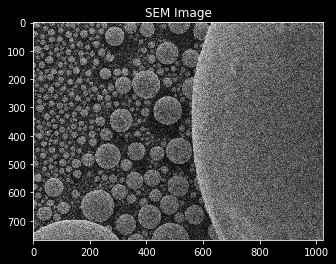

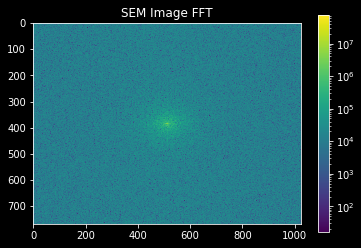

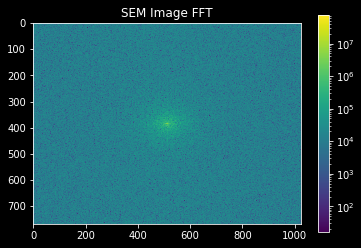

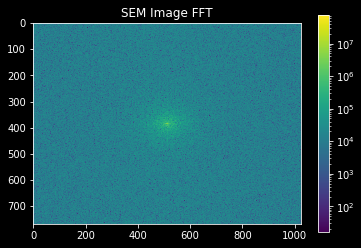

In [19]:
main()